# Date: 04/16/2025

In [1]:
# Pasting these here for easier access

import subprocess
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import matplotlib.colors as mcolacors
import pickle
from tqdm import tqdm  # For progress bar
from multiprocessing import Pool, cpu_count
import os
import sys
import time
import datetime 

### Function 1: Testing efficacy of artemether monotherapy with pmax_lum = 0

In [ ]:
# Function to run a single simulation for a given weight value
def run_single_weight_simulation_AL_pmax_lum_0(weight):
    start_time = time.monotonic()
    command_weight = [
        "/home/venitha_b/Projects/2019-test-ppq-pk/build/run_ppq_pk",
        "--AL",
        "-n", "1000",
        "--pmax_lum", "0",
        "-o", "1",
        "--weight", str(weight)
    ]

    try:
        # Run the command and capture output
        output_weight = subprocess.run(command_weight, capture_output=True, text=True, check=True)

        # Process the output
        lines_weight = output_weight.stdout.splitlines()
        df_weight = pd.DataFrame([line.split(',') for line in lines_weight], columns=["PID", "HOUR", "COMP2CONC_ART", "COMP2CONC_LUM", "PARASITEDENSITY"])
        
        # Clean the DataFrame
        df_weight = df_weight.iloc[1:].apply(pd.to_numeric, errors='coerce')

        # Calculate the efficacy
        if df_weight['PARASITEDENSITY'].isna().any():
            failed_treatment_count = np.nan
        else:
            failed_treatment_count = df_weight[(df_weight['PARASITEDENSITY'] >= 10) & (df_weight['HOUR'] == 671.0)].shape[0]
        
        total_patients = df_weight['PID'].nunique()
        
        if total_patients == 0 or np.isnan(failed_treatment_count): 
            efficacy = np.nan
        else:
            percentage_failed = (failed_treatment_count / total_patients) * 100
            efficacy = (100 - percentage_failed)
            if np.isnan(efficacy):
                efficacy = np.nan
        
        end_time = time.monotonic()
        today = datetime.date.today()
        print("\nToday's date: ", today, "\n")
        print("Length of simulation: ", datetime.timedelta(seconds=end_time - start_time), "\n")

        return efficacy, df_weight, failed_treatment_count
        
    except subprocess.CalledProcessError as e:
        print(f"Error in subprocess for weight: {weight}: {e}")
        return np.nan, None, 0  # Return NaN, None, and 0 in case of failure
    except Exception as e:
        print(f"An unexpected error occurred for weight: {weight}: {e}")
        return np.nan, None, 0  # Return NaN, None, and 0 in case of failure

### Function 2: Testing efficacy of artemether monotherapy with --art flag 


In [ ]:
def run_single_weight_simulation_art_monotherapy(weight):
    start_time = time.monotonic()
    command_weight = [
        "/home/venitha_b/Projects/2019-test-ppq-pk/build/run_ppq_pk",
        "--art",
        "-n", "1000",
        "-o", "1",
        "--weight", str(weight)
    ]

    try:
        # Run the command and capture output
        output_weight = subprocess.run(command_weight, capture_output=True, text=True, check=True)

        # Process the output
        lines_weight = output_weight.stdout.splitlines()
        df_weight = pd.DataFrame([line.split(',') for line in lines_weight], columns=["PID", "HOUR", "COMP2CONC","PARASITEDENSITY"])
        
        # Clean the DataFrame
        df_weight = df_weight.iloc[1:].apply(pd.to_numeric, errors='coerce')

        # Calculate the efficacy
        if df_weight['PARASITEDENSITY'].isna().any():
            failed_treatment_count = np.nan
        else:
            failed_treatment_count = df_weight[(df_weight['PARASITEDENSITY'] >= 10) & (df_weight['HOUR'] == 671.0)].shape[0]
        
        total_patients = df_weight['PID'].nunique()
        
        if total_patients == 0 or np.isnan(failed_treatment_count): 
            efficacy = np.nan
        else:
            percentage_failed = (failed_treatment_count / total_patients) * 100
            efficacy = (100 - percentage_failed)
            if np.isnan(efficacy):
                efficacy = np.nan
        
        end_time = time.monotonic()
        today = datetime.date.today()
        print("\nToday's date: ", today, "\n")
        print("Length of simulation: ", datetime.timedelta(seconds=end_time - start_time), "\n")

        return efficacy, df_weight, failed_treatment_count
        
    except subprocess.CalledProcessError as e:
        print(f"Error in subprocess for weight: {weight}: {e}")
        return np.nan, None, 0  # Return NaN, None, and 0 in case of failure
    except Exception as e:
        print(f"An unexpected error occurred for weight: {weight}: {e}")
        return np.nan, None, 0  # Return NaN, None, and 0 in case of failure

### Function 3: Testing AL efficacy with --AL flag

In [51]:
# Function to run a single simulation for a given weight value

def run_single_weight_simulation_AL(weight):
    start_time = time.monotonic()
    command_weight = [
        "/home/venitha_b/Projects/2019-test-ppq-pk/build/run_ppq_pk",
        "--AL",
        "-n", "1000",
        "-o", "1",
        "--weight", str(weight)
    ]

    try:
        # Run the command and capture output
        output_weight = subprocess.run(command_weight, capture_output=True, text=True, check=True)

        # Process the output
        lines_weight = output_weight.stdout.splitlines()
        df_weight = pd.DataFrame([line.split(',') for line in lines_weight], columns=["PID", "HOUR", "COMP2CONC_ART", "COMP2CONC_LUM", "PARASITEDENSITY"])
        
        # Clean the DataFrame
        df_weight = df_weight.iloc[1:].apply(pd.to_numeric, errors='coerce')

        # Calculate the efficacy
        if df_weight['PARASITEDENSITY'].isna().any():
            failed_treatment_count = np.nan
        else:
            failed_treatment_count = df_weight[(df_weight['PARASITEDENSITY'] >= 10) & (df_weight['HOUR'] == 671.0)].shape[0]
        
        total_patients = df_weight['PID'].nunique()
        
        if total_patients == 0 or np.isnan(failed_treatment_count): 
            efficacy = np.nan
        else:
            percentage_failed = (failed_treatment_count / total_patients) * 100
            efficacy = (100 - percentage_failed)
            if np.isnan(efficacy):
                efficacy = np.nan
        
        end_time = time.monotonic()
        today = datetime.date.today()
        print("\nToday's date: ", today, "\n")
        print("Length of simulation: ", datetime.timedelta(seconds=end_time - start_time), "\n")

        return efficacy, df_weight, failed_treatment_count
        
    except subprocess.CalledProcessError as e:
        print(f"Error in subprocess for weight: {weight}: {e}")
        return np.nan, None, 0  # Return NaN, None, and 0 in case of failure
    except Exception as e:
        print(f"An unexpected error occurred for weight: {weight}: {e}")
        return np.nan, None, 0  # Return NaN, None, and 0 in case of failure

In [ ]:
# Define the weight values to use
#weight_values = [10, 15, 20, 30, 40]

weight_values = [54]
objective = "objective_2.1"

for weight in weight_values:

    #Run the simulation

    efficacy, df_weight, failed_treatment_count = run_single_weight_simulation_AL_pmax_lum_0(weight)

    # Save the DataFrame to a pickle file
    df_weight.to_pickle(f"df_weight_{weight}kg_{objective}.pyobj")

    # Save the DataFrame to a CSV file
    df_weight.to_csv(f"df_weight_{weight}kg_{objective}.csv", index=False)

    print(f"\nThe failed treatment count for weight {weight}kg is:", failed_treatment_count)
    print(f"\nThe percentage efficacy for weight {weight}kg is:", efficacy, "\n")

<br>

<br>

#Plot Hill Function, check Nguyen

# Function 4: Plotting all the state variables

In [45]:
# Function to run a single simulation for a given weight value

def run_single_weight_simulation_AL(weight):
    start_time = time.monotonic()
    command_weight = [
        "/home/venitha_b/Projects/2019-test-ppq-pk/build/run_ppq_pk",
        "--AL",
        "-n", "1",
        "--weight", str(weight)
    ]

    try:
        # Run the command and capture output
        output_weight = subprocess.run(command_weight, capture_output=True, text=True, check=True)
        #print("Raw output from subprocess:", output_weight.stdout)

        # Process the output
        lines_weight = output_weight.stdout.splitlines()
        df_weight = pd.DataFrame([line.split() for line in lines_weight], 
                                 columns=[ "PID",
                                          "HOUR",
                                          "DOSINGCOMP_ARTEMETHER",
                                          "TR1_ARTEMETHER" ,
                                          "TR2_ARTEMETHER",
                                          "TR3_ARTEMETHER",
                                          "TR4_ARTEMETHER",
                                          "TR5_ARTEMETHER",
                                          "TR6_ARTEMETHER",
                                          "TR7_ARTEMETHER",
                                          "CENTRALCONC_ARTEMETHER",
                                          "KILLINGCOMP_ARTEMETHER",
                                          "DOSINGCOMP_LUM",
                                          "CENTRALCONC_LUM",
                                          "PERIPHERALCONC_LUM",
                                          "KILLINGCOMP_LUM",
                                          "PARASITEDENSITY"])
        
        # Clean the DataFrame
        df_weight = df_weight.iloc[1:].apply(pd.to_numeric, errors='coerce')

        #Calculate the efficacy
        if df_weight['PARASITEDENSITY'].isna().any():
            failed_treatment_count = np.nan
        else:
            failed_treatment_count = df_weight[(df_weight['PARASITEDENSITY'] >= 10) & (df_weight['HOUR'] == 671.0)].shape[0]
        
        total_patients = df_weight['PID'].nunique()
        
        if total_patients == 0 or np.isnan(failed_treatment_count): 
            efficacy = np.nan
        else:
            percentage_failed = (failed_treatment_count / total_patients) * 100
            efficacy = (100 - percentage_failed)
            if np.isnan(efficacy):
                efficacy = np.nan
        
        end_time = time.monotonic()
        today = datetime.date.today()
        print("\nToday's date: ", today, "\n")
        print("Length of simulation: ", datetime.timedelta(seconds=end_time - start_time), "\n")

        #return efficacy, df_weight, failed_treatment_count
        return efficacy, df_weight, failed_treatment_count
        
    except subprocess.CalledProcessError as e:
        print(f"Error in subprocess for weight: {weight}: {e}")
        return np.nan, None, 0  # Return NaN, None, and 0 in case of failure
    except Exception as e:
        print(f"An unexpected error occurred for weight: {weight}: {e}")
        return np.nan, None, 0  # Return NaN, None, and 0 in case of failure

In [99]:
# Define the weight values to use
#weight_values = [10, 15, 20, 30, 40]

weight_values = [54]
objective = "objective_2.1"

for weight in weight_values:

    #Run the simulation

    efficacy, df_weight, failed_treatment_count = run_single_weight_simulation_AL(weight)

    #df_weight = run_single_weight_simulation_AL(weight)


    # Save the DataFrame to a pickle file
    df_weight.to_pickle(f"df_weight_{weight}kg_{objective}.pyobj")

    # Save the DataFrame to a CSV file
    df_weight.to_csv(f"df_weight_{weight}kg_{objective}.csv", index=False)

    print(f"\nThe failed treatment count for weight {weight}kg is:", failed_treatment_count)
    print(f"\nThe percentage efficacy for weight {weight}kg is:", efficacy, "\n")


Today's date:  2025-04-16 

Length of simulation:  0:00:00.020247 


The failed treatment count for weight 54kg is: 0

The percentage efficacy for weight 54kg is: 100.0 



In [101]:
df_weight.columns 

Index(['PID', 'HOUR', 'DOSINGCOMP_ARTEMETHER', 'TR1_ARTEMETHER',
       'TR2_ARTEMETHER', 'TR3_ARTEMETHER', 'TR4_ARTEMETHER', 'TR5_ARTEMETHER',
       'TR6_ARTEMETHER', 'TR7_ARTEMETHER', 'CENTRALCONC_ARTEMETHER',
       'KILLINGCOMP_ARTEMETHER', 'DOSINGCOMP_LUM', 'CENTRALCONC_LUM',
       'PERIPHERALCONC_LUM', 'KILLINGCOMP_LUM', 'PARASITEDENSITY'],
      dtype='object')

Central volume data saved to 'central_volume_data.csv'.


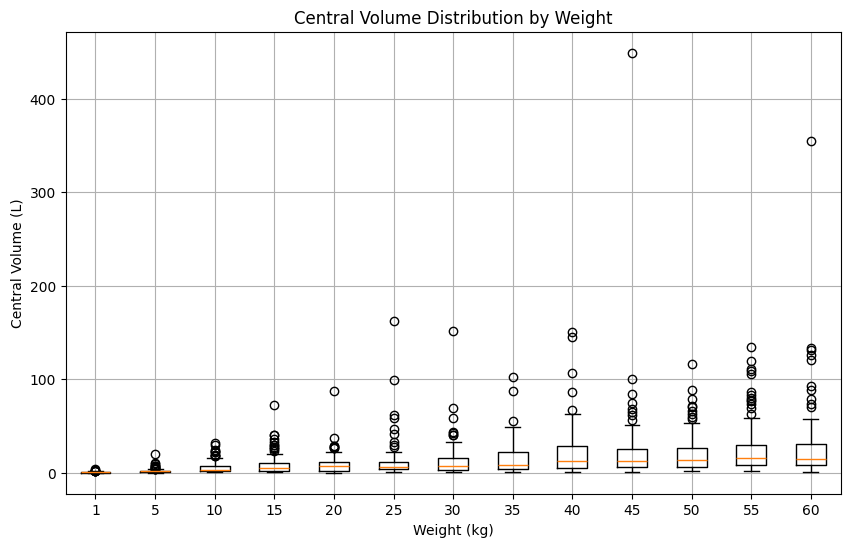

In [ ]:
weight_values = [1, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60]

# Create a dictionary to store central volumes for each weight
central_volume_dict = {}

# Loop through each weight
for weight in weight_values:
    # Generate 100 random variables
    eta_2rv = np.random.normal(loc=0, scale=math.sqrt(1.12), size=100)
    
    # Compute central volume for each random variable
    central_volume = (11.2 * ((weight / 42) ** 1)) * np.exp(eta_2rv)
    
    # Store the central volumes in the dictionary
    central_volume_dict[weight] = central_volume

# Convert the dictionary to a DataFrame for easier plotting
central_volume_df = pd.DataFrame(central_volume_dict)

# Save the DataFrame to a CSV file for later use
central_volume_df.to_csv("central_volume_data.csv", index=False)

print("Central volume data saved to 'central_volume_data.csv'.")

plt.figure(figsize=(10, 6))
plt.boxplot(central_volume_df.values, tick_labels=central_volume_df.columns)
plt.xlabel("Weight (kg)")
plt.ylabel("Central Volume (L)")
plt.title("Central Volume Distribution by Weight")
plt.grid()
plt.savefig("central_volume_distribution.png")
plt.show()

### Objective 2.3: Testing AL efficacy with --AL flag

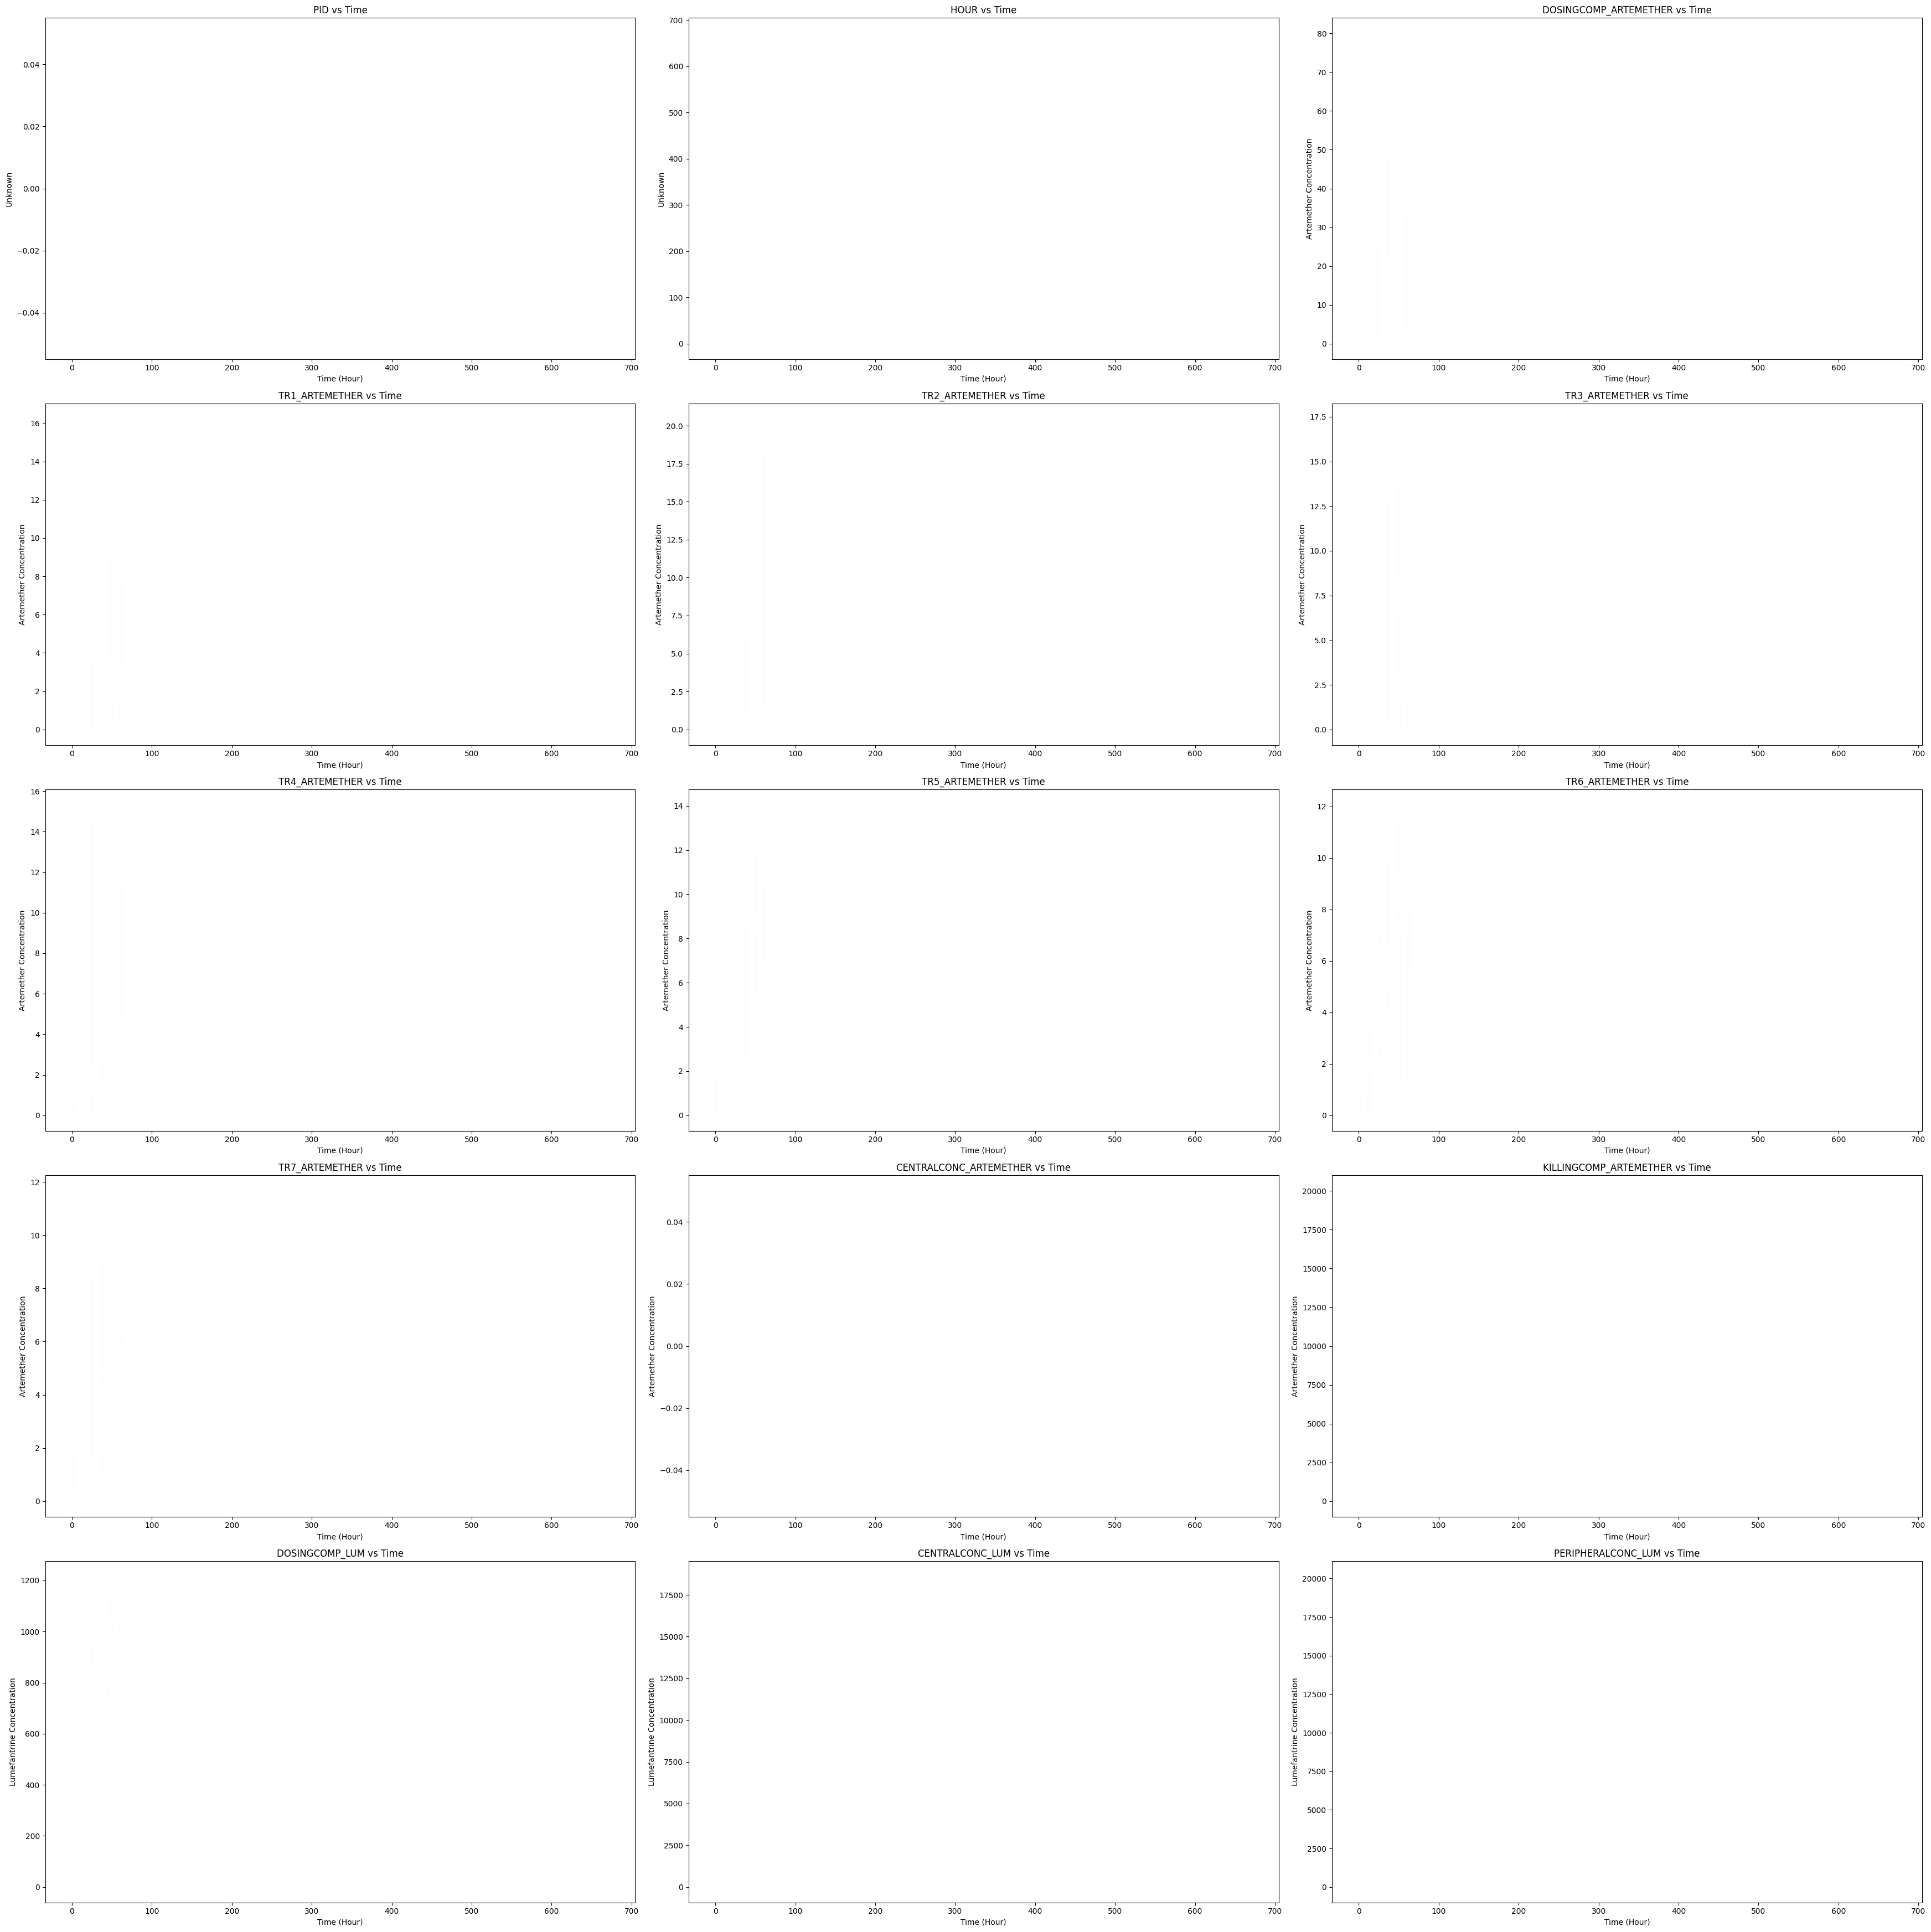

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(35, 35))

# Define the number of unique PIDs
num_pids = len(df_weight['PID'].unique())

# Create a colormap
colormap = plt.get_cmap('BuGn')  # Ensure compatibility with different Matplotlib versions
norm = plt.Normalize(vmin=0, vmax=num_pids - 1)  # Normalize values to 0-1 range

# Total of 15 subplots
# List of columns to plot
# list_columns = [
#     "DOSINGCOMP_ARTEMETHER",
#     "TR1_ARTEMETHER",
#     "TR2_ARTEMETHER",
#     "TR3_ARTEMETHER",
#     "TR4_ARTEMETHER",
#     "TR5_ARTEMETHER",
#     "TR6_ARTEMETHER",
#     "TR7_ARTEMETHER",
#     "CENTRALCONC_ARTEMETHER",
#     "KILLINGCOMP_ARTEMETHER",
#     "DOSINGCOMP_LUM",
#     "CENTRALCONC_LUM",
#     "PERIPHERALCONC_LUM",
#     "KILLINGCOMP_LUM",
#     "PARASITEDENSITY"
# ]

list_columns =  df_weight.columns[:15]

# Adjust the subplot grid to fit all plots
rows = 5  # Number of rows
cols = 3  # Number of columns

for i, column in enumerate(list_columns):
    plt.subplot(rows, cols, i + 1)
    color = colormap(norm(i))  # Use 'i' instead of 'j' for normalization
    plt.plot(df_weight['HOUR'], df_weight[column], color=color, alpha=0.25)
    plt.xlabel('Time (Hour)')
    
    # Set appropriate y-axis labels
    if column == "PARASITEDENSITY":
        plt.ylabel('Parasite Density (parasite per microlitre)')
    elif "ARTEMETHER" in column:
        plt.ylabel('Artemether Concentration')
    elif "LUM" in column:
        plt.ylabel('Lumefantrine Concentration')
    else:
        plt.ylabel('Unknown')

    plt.title(f'{column} vs Time')

plt.tight_layout()
plt.show()

pandas.core.indexes.base.Index

In [82]:
df_weight

,PID,HOUR,DOSINGCOMP_ARTEMETHER,TR1_ARTEMETHER,TR2_ARTEMETHER,TR3_ARTEMETHER,TR4_ARTEMETHER,TR5_ARTEMETHER,TR6_ARTEMETHER,TR7_ARTEMETHER,CENTRALCONC_ARTEMETHER,KILLINGCOMP_ARTEMETHER,DOSINGCOMP_LUM,CENTRALCONC_LUM,PERIPHERALCONC_LUM,KILLINGCOMP_LUM,PARASITEDENSITY
1,0,0.0,80.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,20000.000,480.000,0.000,0.000,19124.031,20000.000
2,0,1.0,0.012,0.105,0.462,1.358,2.991,5.273,7.745,9.751,0.0,18310.317,461.825,1896.242,48.346,16820.164,18310.317
3,0,2.0,0.000,0.000,0.000,0.002,0.007,0.025,0.074,0.186,0.0,16115.573,444.338,3316.184,176.607,14804.035,16115.573
4,0,3.0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,14192.672,427.514,4364.594,363.827,13037.626,14192.672
5,0,4.0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,12505.469,411.326,5123.674,593.691,11487.733,12505.469
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
668,0,667.0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,364.423,0.000,114.952,4952.236,364.423,364.423
669,0,668.0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,382.272,0.000,114.454,4930.775,382.272,382.272
670,0,669.0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,400.993,0.000,113.958,4909.406,400.993,400.993
671,0,670.0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,420.627,0.000,113.464,4888.131,420.627,420.627


In [38]:
# Function to run a single simulation for a given weight value

def run_single_weight_simulation_AL(weight):
    start_time = time.monotonic()
    command_weight = [
        "/home/venitha_b/Projects/2019-test-ppq-pk/build/run_ppq_pk",
        "--AL",
        "-n", "100",
        "--weight", str(weight),
        "-o", "1"
    ]

    try:
        # Run the command and capture output
        output_weight = subprocess.run(command_weight, capture_output=True, text=True, check=True)
        #print("Raw output from subprocess:", output_weight.stdout)

        # Process the output
        lines_weight = output_weight.stdout.splitlines()
        df_weight = pd.DataFrame([line.split() for line in lines_weight], 
                                 columns=[ "PID",
                                          "HOUR",
                                          "DOSINGCOMP_ARTEMETHER",
                                          "TR1_ARTEMETHER" ,
                                          "TR2_ARTEMETHER",
                                          "TR3_ARTEMETHER",
                                          "TR4_ARTEMETHER",
                                          "TR5_ARTEMETHER",
                                          "TR6_ARTEMETHER",
                                          "TR7_ARTEMETHER",
                                          "CENTRALCONC_ARTEMETHER",
                                          "KILLINGCOMP_ARTEMETHER",
                                          "DOSINGCOMP_LUM",
                                          "CENTRALCONC_LUM",
                                          "PERIPHERALCONC_LUM",
                                          "KILLINGCOMP_LUM",
                                          "PARASITEDENSITY"])
        
        # Clean the DataFrame
        df_weight = df_weight.iloc[1:].apply(pd.to_numeric, errors='coerce')

        #Calculate the efficacy
        if df_weight['PARASITEDENSITY'].isna().any():
            failed_treatment_count = np.nan
        else:
            failed_treatment_count = df_weight[(df_weight['PARASITEDENSITY'] >= 10) & (df_weight['HOUR'] == 671.0)].shape[0]
        
        total_patients = df_weight['PID'].nunique()
        
        if total_patients == 0 or np.isnan(failed_treatment_count): 
            efficacy = np.nan
        else:
            percentage_failed = (failed_treatment_count / total_patients) * 100
            efficacy = (100 - percentage_failed)
            if np.isnan(efficacy):
                efficacy = np.nan
        
        end_time = time.monotonic()
        today = datetime.date.today()
        print("\nToday's date: ", today, "\n")
        print("Length of simulation: ", datetime.timedelta(seconds=end_time - start_time), "\n")

        #return efficacy, df_weight, failed_treatment_count
        return efficacy, df_weight, failed_treatment_count
        
    except subprocess.CalledProcessError as e:
        print(f"Error in subprocess for weight: {weight}: {e}")
        return np.nan, None, 0  # Return NaN, None, and 0 in case of failure
    except Exception as e:
        print(f"An unexpected error occurred for weight: {weight}: {e}")
        return np.nan, None, 0  # Return NaN, None, and 0 in case of failure

In [39]:
# Define the weight values to use
#weight_values = [10, 15, 20, 30, 40]

weight_values = [54]
objective = "objective_2.1"

for weight in weight_values:

    #Run the simulation

    efficacy, df_weight, failed_treatment_count = run_single_weight_simulation_AL(weight)

    #df_weight = run_single_weight_simulation_AL(weight)


    # Save the DataFrame to a pickle file
    df_weight.to_pickle(f"df_weight_{weight}kg_{objective}.pyobj")

    # Save the DataFrame to a CSV file
    df_weight.to_csv(f"df_weight_{weight}kg_{objective}.csv", index=False)

    print(f"\nThe failed treatment count for weight {weight}kg is:", failed_treatment_count)
    print(f"\nThe percentage efficacy for weight {weight}kg is:", efficacy, "\n")


Today's date:  2025-04-16 

Length of simulation:  0:00:13.677186 


The failed treatment count for weight 54kg is: 37

The percentage efficacy for weight 54kg is: 63.0 



In [70]:
eta_2rv = np.random.normal(loc = 0, scale = math.sqrt(1.12), size = 100)
print(eta_2rv)

[-2.01349498 -0.22140964 -0.67733928 -0.96186791 -2.41472768 -0.68959028
  1.13308476  0.2902856   0.09871445 -0.89275823  1.06016686 -0.33040005
 -0.60967837 -0.93638384  1.11157505  1.08522236  1.50243344  0.23821422
  0.33137461 -0.32417518  1.74447204 -1.28226896  1.35309417  0.1013596
  0.96204315 -0.72856814  1.31744119 -2.15889804 -0.03089092  0.49667559
  1.09947778 -0.32069038 -0.97782659  0.83916106 -1.63814321  0.42712278
 -1.00181564  1.55160199  0.37048003 -0.65507352 -0.8870734  -0.20444912
  0.02437499 -0.62322326  3.22527633  0.42376978 -0.2003073   1.48631051
 -0.60258651 -0.18104647  0.57247903  1.18414289 -0.50789595 -0.51189356
 -0.61140748 -0.22947579  0.10055635  1.96365022 -0.27741666  0.48298941
  1.49226789  2.73251355 -0.51478676 -1.65939293  0.74505287 -1.34636958
 -1.18368846 -1.14075514 -0.13650651  0.15562358  0.19820665 -0.63982734
  0.79575628  0.74116663  1.06162372  1.18110216 -1.20610892 -0.39989347
 -0.18208569 -0.0667225   1.47660897 -1.7112349  -0.